In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from preprocessing import preprocessing
from pca import pca_load
from pca_all import pca_load_all
from baseline import baseline
from nn import nn_load
from ae import ae_load
#from nn_rf import nn_separate_load

from lr import LR
from rf import RF
from roc import ROC


In [9]:
datatype = "binary"
code_type = "full"
# datatype = "cont"
filename_add = int(code_type == "full")
X = pd.read_csv("data/stroke_data_" + datatype + filename_add*"_full" + ".csv")
X.dropna(inplace=True)

In [ ]:
LR_accuracy = np.zeros((5,5))
LR_recall = np.zeros((5,5))
RF_accuracy = np.zeros((5,5))
RF_recall = np.zeros((5,5))

Obesity PCA data not found, training PCA now...


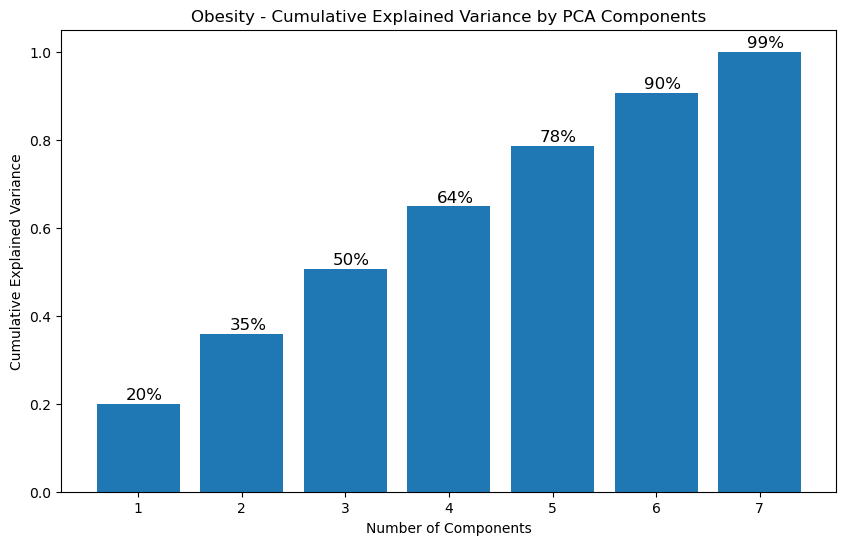

hyperlipidemia PCA data not found, training PCA now...


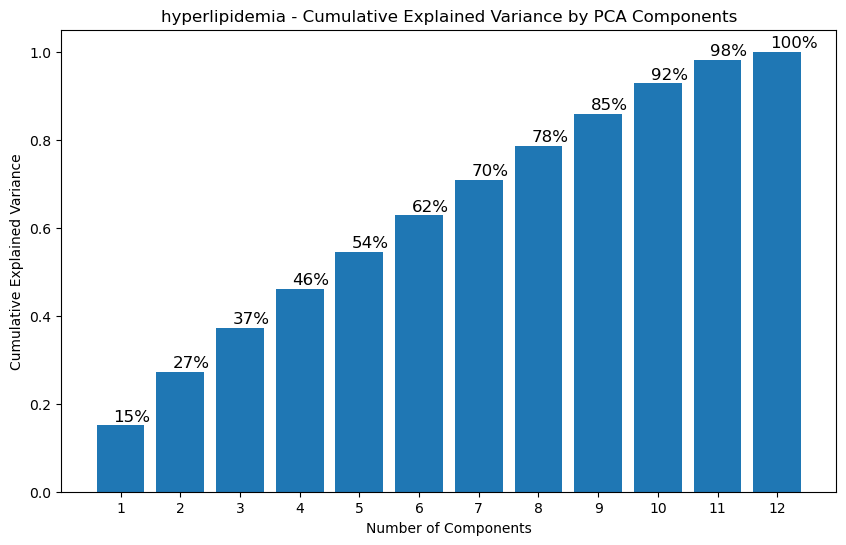

diabetes PCA data not found, training PCA now...


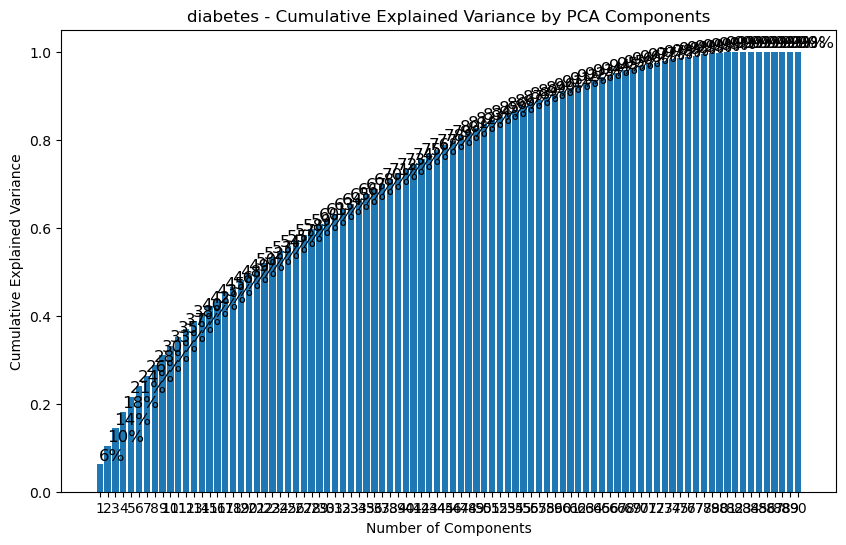

hypertension PCA data not found, training PCA now...


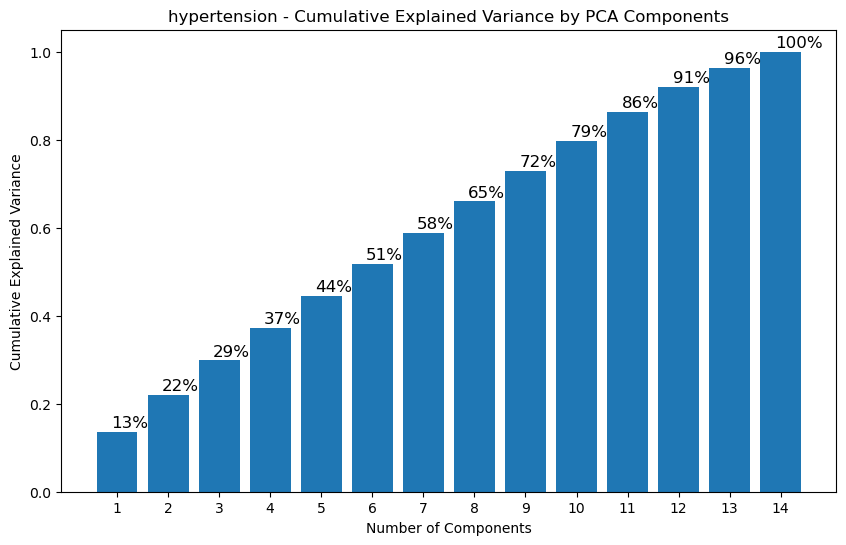

nicotine PCA data not found, training PCA now...


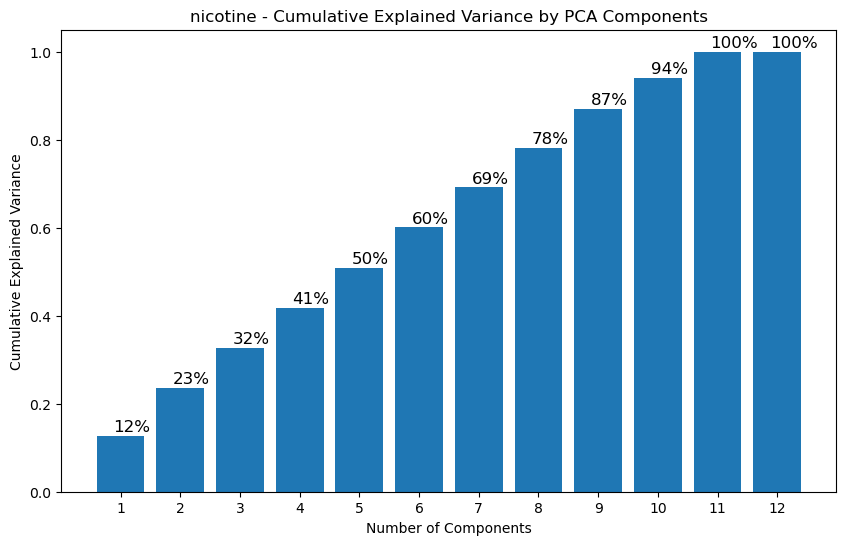

alcohol PCA data not found, training PCA now...


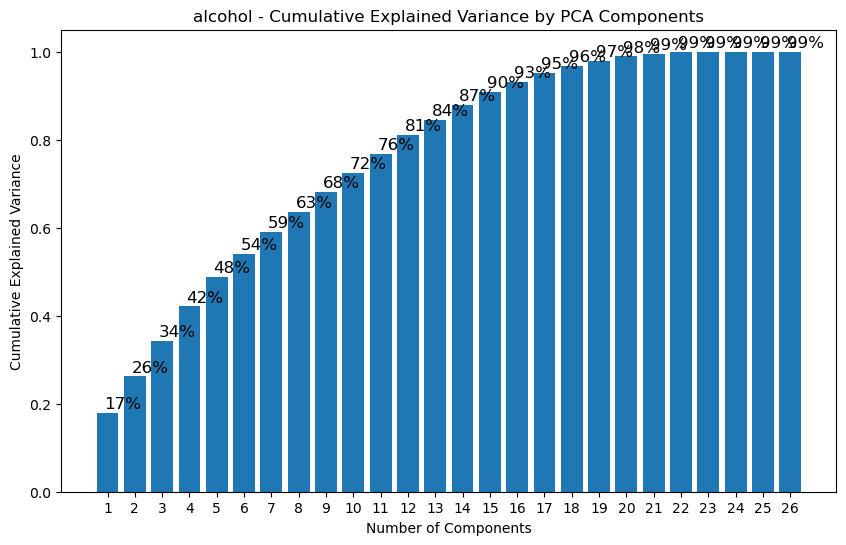

af PCA data not found, training PCA now...


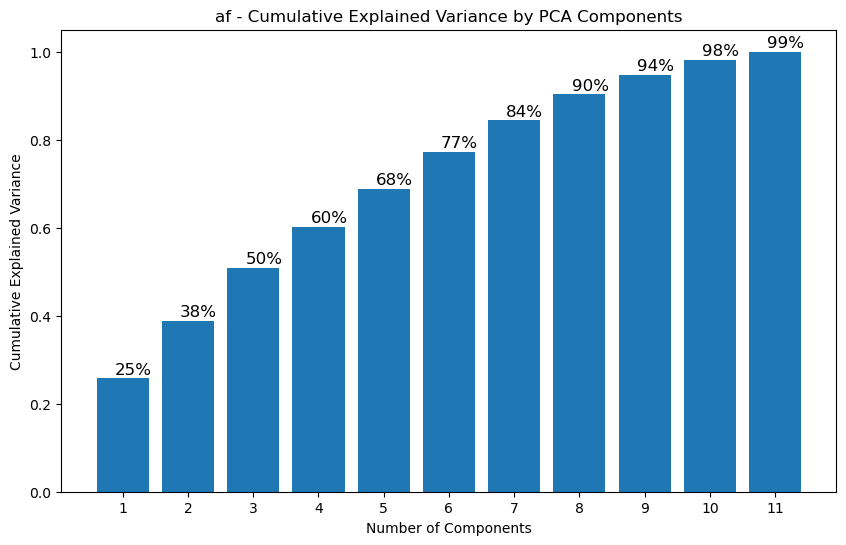

heart_diseases PCA data not found, training PCA now...


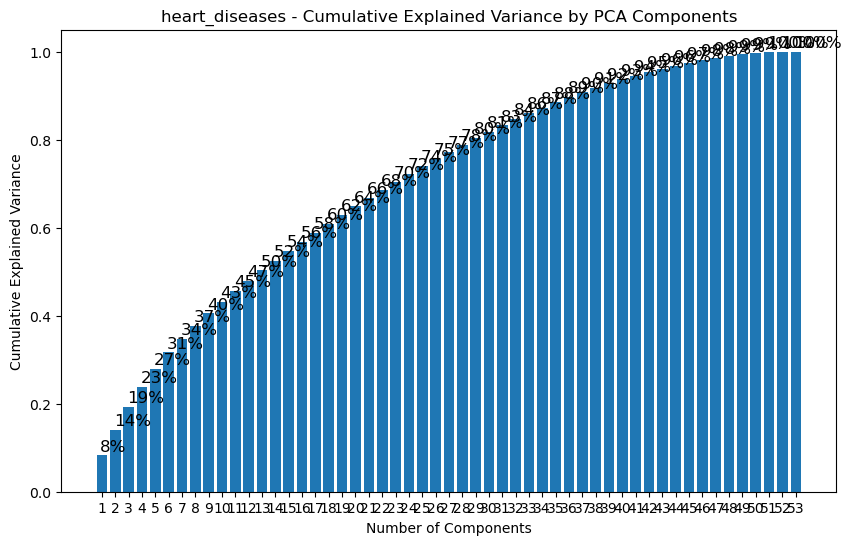

strokes PCA data not found, training PCA now...


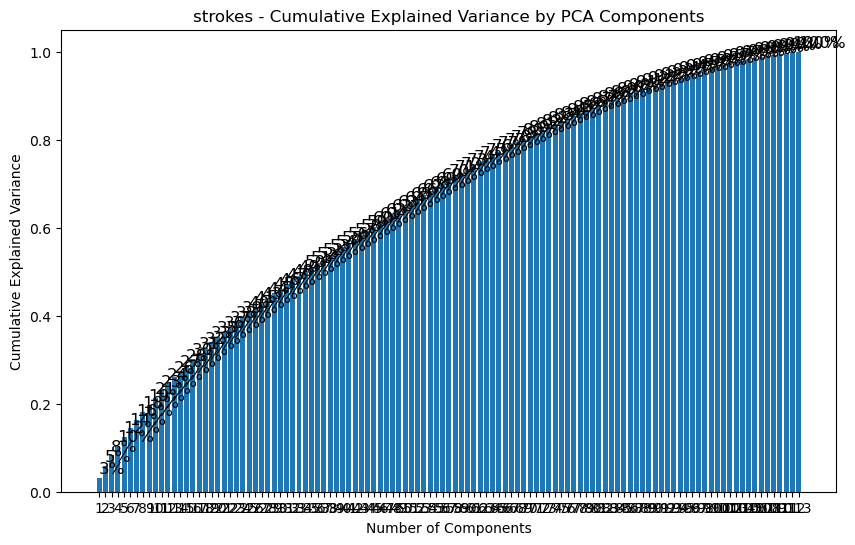

Neural Network feature data not found, training Neural Network now...
Test Accuracy after epoch [1/101]: 0.6759
Test Accuracy after epoch [6/101]: 0.8153
Test Accuracy after epoch [11/101]: 0.8204
Test Accuracy after epoch [16/101]: 0.8230
Test Accuracy after epoch [21/101]: 0.8206
Test Accuracy after epoch [26/101]: 0.8201
Test Accuracy after epoch [31/101]: 0.8228
Test Accuracy after epoch [36/101]: 0.8225
Test Accuracy after epoch [41/101]: 0.8223
Test Accuracy after epoch [46/101]: 0.8209
Test Accuracy after epoch [51/101]: 0.8237
Test Accuracy after epoch [56/101]: 0.8206
Test Accuracy after epoch [61/101]: 0.8225
Test Accuracy after epoch [66/101]: 0.8209
Test Accuracy after epoch [71/101]: 0.8213
Test Accuracy after epoch [76/101]: 0.8230
Test Accuracy after epoch [81/101]: 0.8237
Test Accuracy after epoch [86/101]: 0.8223
Test Accuracy after epoch [91/101]: 0.8233
Test Accuracy after epoch [96/101]: 0.8211
Test Accuracy after epoch [101/101]: 0.8240
Neural Network training fini

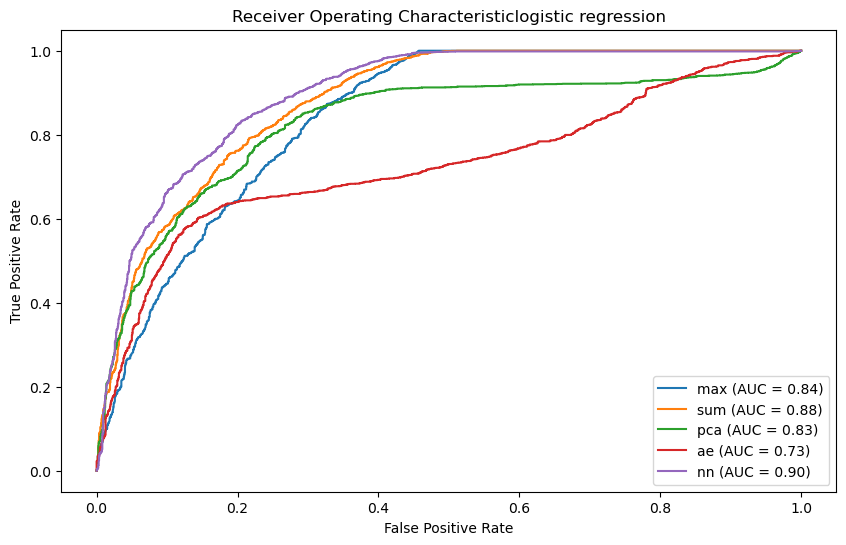

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8381892607753432
Recall: 0.8956089478044739
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': 30, 'max_features': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.8194076571153384
Recall: 0.8972659486329743
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8401155790994462
Recall: 0.8902236951118475
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': 30, 'max_features': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.84

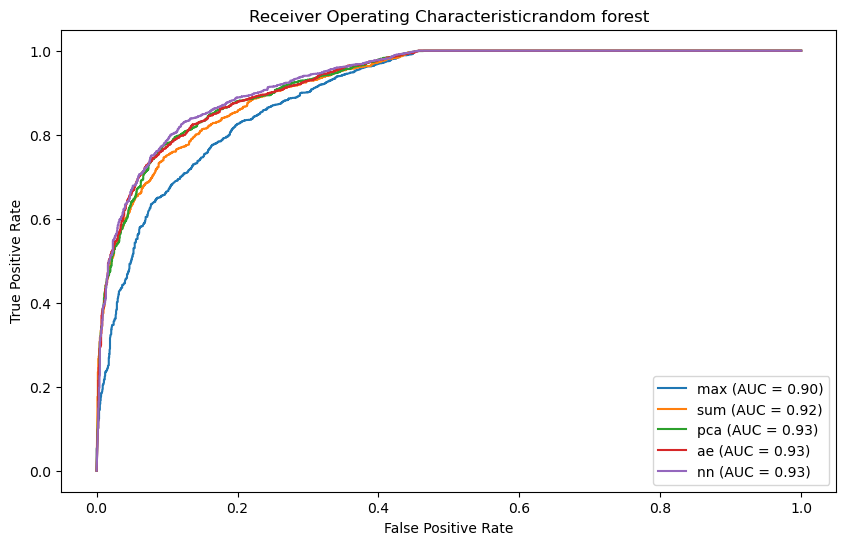

In [6]:
I = 5
file_path = 'data/'
for i in range(I):
    seed = i
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)

    disease_mapping = {
    "Obesity": ['E65','E66','E67','E68'], 
    "hyperlipidemia": ['E78'],
    "diabetes": ['E10','E11','E12','E13','E14'],
    "hypertension": ['I10','I11','I12','I13','I15'],
    "nicotine":['F17','Z72'],
    "alcohol":['F10'],
    "af":['I48'],
    "heart_diseases":['I20','I21','I22','I24','I25'],
    "strokes":['I63','I64','I60','G45','I61'],
    }

    pca_train, pca_test = pca_load(datatype, disease_mapping, X_train, X_test, code_type, pc0_only=True)
    max_train, max_test = baseline(datatype, disease_mapping, "max", X_train, X_test)
    sum_train, sum_test = baseline(datatype, disease_mapping, "sum", X_train, X_test)
    nn_train, nn_test = nn_load(datatype, disease_mapping, X_train, X_test, code_type)
    ae_train, ae_test = ae_load(datatype, disease_mapping, X_train, X_test, code_type)
    # nn_rf_train, nn_rf_test = nn_separate_load(datatype, disease_mapping, X_train, X_test, code_type)

    print(pca_train.shape, pca_test.shape)
    print(max_train.shape, max_test.shape)
    print(sum_train.shape, sum_test.shape)
    print(nn_train.shape,nn_test.shape)
    print(ae_train.shape,ae_test.shape)
    # print(nn_rf_train.shape, nn_rf_test.shape)

    Y_scores_sum, accuracy_sum, recall_sum = LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = seed)
    Y_scores_max, accuracy_max, recall_max = LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = seed)
    Y_scores_pca, accuracy_pca, recall_pca = LR(pca_train,pca_test,tolerance = 1e-4,iter = 4000, seed = seed)
    Y_scores_nn, accuracy_nn, recall_nn = LR(nn_train,nn_test,tolerance = 1e-4,iter = 4000, seed = seed)
    Y_scores_ae, accuracy_ae, recall_ae = LR(ae_train,ae_test,tolerance = 1e-4,iter = 4000, seed = seed)
    Y_scores = [Y_scores_max, Y_scores_sum, Y_scores_pca, Y_scores_ae, Y_scores_nn]
    Y_true = pca_test["recur"]

    LR_accuracy[i,0] = accuracy_max
    LR_accuracy[i,1] = accuracy_sum
    LR_accuracy[i,2] = accuracy_pca
    LR_accuracy[i,3] = accuracy_ae
    LR_accuracy[i,4] = accuracy_nn

    LR_recall[i,0] = recall_max
    LR_recall[i,1] = recall_sum
    LR_recall[i,2] = recall_pca
    LR_recall[i,3] = recall_ae
    LR_recall[i,4] = recall_nn


    file_path = 'data/'
    Y_scores = pd.DataFrame(Y_scores)
    Y_scores.to_csv(file_path + "LR_scores_" + str(seed) + ".csv", index=False)
    Y_scores = Y_scores.values.tolist()
    Y_true = pd.DataFrame(Y_true)
    Y_true.to_csv(file_path + "LR_true_" + str(seed) + ".csv", index=False)
    Y_true = Y_true.values.tolist()
    method = ["max","sum","pca","ae","nn"]
    ROC(Y_true, Y_scores, method, LR = True)

    param_grid = {
        'n_estimators': [100,200,300],  
        'max_features': [0.8, 0.9, 1],  
        'max_depth': [None, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4],  
        'bootstrap': [True]  
    }

    Y_scores_sum, accuracy_sum, recall_sum = RF(sum_train,sum_test,params=param_grid)
    Y_scores_max, accuracy_max, recall_max = RF(max_train,max_test,params=param_grid)
    Y_scores_pca, accuracy_pca, recall_pca = RF(pca_train,pca_test,params=param_grid)
    Y_scores_nn, accuracy_nn, recall_nn = RF(nn_train,nn_test,params=param_grid)
    Y_scores_ae, accuracy_ae, recall_ae = RF(ae_train,ae_test,params=param_grid)
    Y_scores = [Y_scores_max, Y_scores_sum, Y_scores_pca, Y_scores_ae, Y_scores_nn]
    Y_true = pca_test["recur"]

    RF_accuracy[i,0] = accuracy_max
    RF_accuracy[i,1] = accuracy_sum
    RF_accuracy[i,2] = accuracy_pca
    RF_accuracy[i,3] = accuracy_ae
    RF_accuracy[i,4] = accuracy_nn

    RF_recall[i,0] = recall_max
    RF_recall[i,1] = recall_sum
    RF_recall[i,2] = recall_pca
    RF_recall[i,3] = recall_ae
    RF_recall[i,4] = recall_nn

    Y_scores = pd.DataFrame(Y_scores)
    Y_scores.to_csv(file_path + "RF_scores_" + str(seed) + ".csv", index=False)
    Y_scores = Y_scores.values.tolist()
    Y_true = pd.DataFrame(Y_true)
    Y_true.to_csv(file_path + "RF_true_" + str(seed) + ".csv", index=False)
    Y_true = Y_true.values.tolist()
    method = ["max","sum","pca","ae","nn"]
    ROC(Y_true, Y_scores, method, LR = False)

In [ ]:
file_path = 'data/'
Y_scores = pd.DataFrame(Y_scores)
Y_scores.to_csv(file_path + "LR_scores_" + str(seed) + ".csv", index=False)
Y_scores = Y_scores.values.tolist()
Y_true = pd.DataFrame(Y_true)
Y_true.to_csv(file_path + "LR_true_" + str(seed) + ".csv", index=False)
Y_true = Y_true.values.tolist()
method = ["max","sum","pca","ae","nn"]
ROC(Y_true, Y_scores, method, LR = True)

param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.8, 0.9, 1],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]  
}

Y_scores_sum, accuracy_sum, recall_sum = RF(sum_train,sum_test,params=param_grid)
Y_scores_max, accuracy_max, recall_max = RF(max_train,max_test,params=param_grid)
Y_scores_pca, accuracy_pca, recall_pca = RF(pca_train,pca_test,params=param_grid)
Y_scores_nn, accuracy_nn, recall_nn = RF(nn_train,nn_test,params=param_grid)
Y_scores_ae, accuracy_ae, recall_ae = RF(ae_train,ae_test,params=param_grid)
Y_scores = [Y_scores_max, Y_scores_sum, Y_scores_pca, Y_scores_ae, Y_scores_nn]
Y_true = pca_test["recur"]


Y_scores = pd.DataFrame(Y_scores)
Y_scores.to_csv(file_path + "RF_scores_" + str(seed) + ".csv", index=False)
Y_scores = Y_scores.values.tolist()
Y_true = pd.DataFrame(Y_true)
Y_true.to_csv(file_path + "RF_true_" + str(seed) + ".csv", index=False)
Y_true = Y_true.values.tolist()
method = ["max","sum","pca","ae","nn"]
ROC(Y_true, Y_scores, method, LR = False)

In [9]:
pd.DataFrame(LR_accuracy).to_csv(file_path+"LR_accuracy.csv")
pd.DataFrame(LR_recall).to_csv(file_path+"LR_recall.csv")
pd.DataFrame(RF_accuracy).to_csv(file_path+"RF_accuracy.csv")
pd.DataFrame(RF_recall).to_csv(file_path+"RF_recall.csv")

In [21]:
print(np.mean(LR_accuracy,axis=0))
print(np.std(LR_accuracy,axis=0))
print(np.mean(LR_recall,axis=0))
print(np.std(LR_recall,axis=0))

[0.8005779  0.78333735 0.75526126 0.65591139 0.82080424]
[0.00634407 0.00381756 0.00713908 0.01284383 0.00562315]
[0.98758295 0.77167469 0.7128061  0.74473887 0.91219044]
[0.00329948 0.00829157 0.01258316 0.04543896 0.00655832]


In [18]:
print(np.mean(RF_accuracy,axis=0))
print(np.std(RF_accuracy,axis=0))
print(np.mean(RF_recall,axis=0))
print(np.std(RF_recall,axis=0))

[0.8142066  0.83371057 0.83751505 0.83640742 0.8420419 ]
[0.00540271 0.00663742 0.00541943 0.0055174  0.00395071]
[0.90251132 0.89220053 0.89908753 0.90028545 0.89928556]
[0.01016784 0.00296002 0.00621793 0.00440932 0.01446205]
